In [2]:
import axelrod as axl
import numpy as np

import opt_mo
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [3]:
import seaborn as sns
from scipy import stats

In [4]:
font = {"size": 10, "weight": "bold"}
matplotlib.rc("font", **font)

In [ ]:
def read_sql_data_frame(path):
    engine = sa.create_engine("sqlite:///%s" % path)
    connection = engine.connect()

    return pd.read_sql("experiments", connection)

**Preparation of data and analysis functions**

In [5]:
df_with_g = opt_mo.tools.read_sql_data_frame('../data/with_gambler/main.db')

In [6]:
df_with_g.describe()

,exp_index,first_opponent_q_1,first_opponent_q_2,first_opponent_q_3,first_opponent_q_4,second_opponent_q_1,second_opponent_q_2,second_opponent_q_3,second_opponent_q_4,mem_one_p_1,...,gambler_paramater_p_8,gambler_paramater_p_9,gambler_paramater_p_10,gambler_paramater_p_11,gambler_paramater_p_12,gambler_paramater_p_13,gambler_paramater_p_14,gambler_paramater_p_15,gambler_paramater_p_16,gambler_utility
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,...,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,67.586667,0.514734,0.510543,0.575109,0.522532,0.485940,0.517128,0.499031,0.472124,0.237897,...,0.386861,0.053493,0.086910,0.447596,0.559510,0.177884,0.255162,0.555444,0.463255,3.151060
std,51.252447,0.292628,0.272759,0.284117,0.320433,0.274498,0.289283,0.301541,0.273378,0.394317,...,0.393129,0.220169,0.277525,0.401373,0.410306,0.357049,0.424399,0.422734,0.400987,0.607334
min,0.000000,0.012278,0.011655,0.016764,0.008730,0.000452,0.016881,0.000403,0.016723,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.925565
25%,18.500000,0.243709,0.218075,0.394448,0.220834,0.273839,0.265451,0.235908,0.217876,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.152913,0.000000,0.000000,0.081597,0.000000,2.782290
50%,37.000000,0.521984,0.559772,0.635000,0.511492,0.495435,0.515018,0.530088,0.507436,0.000000,...,0.244319,0.000000,0.000000,0.341631,0.611954,0.000000,0.000000,0.657737,0.460196,3.145940
75%,117.500000,0.729817,0.722186,0.792959,0.857191,0.734570,0.764668,0.749235,0.695382,0.325170,...,0.800976,0.000000,0.000000,0.842797,1.000000,0.000000,0.558431,1.000000,0.864628,3.500140
max,136.000000,0.979050,0.983214,0.983879,0.998631,0.986339,0.996817,0.999129,0.998740,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.638720


In [7]:
df = opt_mo.tools.read_sql_data_frame('../data/without_gambler/main.db')

In [8]:
df.describe()

,exp_index,first_opponent_q_1,first_opponent_q_2,first_opponent_q_3,first_opponent_q_4,second_opponent_q_1,second_opponent_q_2,second_opponent_q_3,second_opponent_q_4,mem_one_p_1,...,mem_one_cycle_length,reactive_p_1,reactive_p_2,reactive_p_3,reactive_p_4,evol_reactive_p_1,evol_reactive_p_2,evol_reactive_p_3,evol_reactive_p_4,reactive_cycle_length
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,...,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,419.071429,0.477550,0.501947,0.509390,0.488683,0.513143,0.507405,0.495763,0.499153,0.272358,...,3.164541,0.050889,0.097830,0.050889,0.097830,0.050250,0.027594,0.050250,0.027594,1.183673
std,264.200942,0.290498,0.286435,0.295899,0.289056,0.288925,0.277410,0.287635,0.287244,0.412107,...,30.182412,0.216542,0.213339,0.216542,0.213339,0.217291,0.087105,0.217291,0.087105,0.889524
min,0.000000,0.001186,0.000426,0.000538,0.001145,0.000452,0.000210,0.000403,0.000720,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,195.750000,0.214647,0.243683,0.249847,0.242438,0.258440,0.276830,0.258320,0.248554,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,391.500000,0.476869,0.518519,0.523173,0.462762,0.510772,0.513080,0.496208,0.504683,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,626.250000,0.724962,0.742359,0.770255,0.746980,0.763097,0.728807,0.738438,0.754106,0.562131,...,1.000000,0.000000,0.052026,0.000000,0.052026,0.000000,0.000000,0.000000,0.000000,1.000000
max,962.000000,0.998462,0.998575,0.999550,0.999766,0.998728,0.999653,0.999129,0.998740,1.000000,...,817.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999182,1.000000,0.999182,15.000000


**Is ZD code**

In [9]:
vector = [0.8888888888888888, 0.5, 0.3333333333333333, 0.0]

In [10]:
opt_mo.tools.is_ZD(vector)

True

In [11]:
SSerror = opt_mo.tools.get_least_squares(vector)

In [12]:
np.round(SSerror)

-0.0

**Number of best responses that are ZD**

In [13]:
df["is_ZD"] = df.apply(
    lambda row: opt_mo.tools.is_ZD(
        vector=[
            row["mem_one_p_1"],
            row["mem_one_p_2"],
            row["mem_one_p_3"],
            row["mem_one_p_4"],
        ]
    ),
    axis=1,
)
df["SSerror"] = df.apply(
    lambda row: opt_mo.tools.get_least_squares(
        vector=[
            row["mem_one_p_1"],
            row["mem_one_p_2"],
            row["mem_one_p_3"],
            row["mem_one_p_4"],
        ]
    ),
    axis=1,
)


In [14]:
sum(df["is_ZD"]), max(df["SSerror"]), min(df["SSerror"])

(3, 2.470588191764706, 0.0)

In [15]:
df["evol_is_ZD"] = df.apply(
    lambda row: opt_mo.tools.is_ZD(
        vector=[
            row["evol_mem_one_p_1"],
            row["evol_mem_one_p_2"],
            row["evol_mem_one_p_3"],
            row["evol_mem_one_p_4"],
        ]
    ),
    axis=1,
)
df["evol_SSerror"] = df.apply(
    lambda row: opt_mo.tools.get_least_squares(
        vector=[
            row["evol_mem_one_p_1"],
            row["evol_mem_one_p_2"],
            row["evol_mem_one_p_3"],
            row["evol_mem_one_p_4"],
        ]
    ),
    axis=1,
)


In [16]:
sum(df["evol_is_ZD"]), max(df["evol_SSerror"]), min(df["evol_SSerror"])

(0, 1.5294117376470586, 5.882353000291276e-18)

In [17]:
df["reactive_is_ZD"] = df.apply(
    lambda row: opt_mo.tools.is_ZD(
        vector=[
            row["reactive_p_1"],
            row["reactive_p_2"],
            row["reactive_p_3"],
            row["reactive_p_4"],
        ]
    ),
    axis=1,
)
df["reactive_SSerror"] = df.apply(
    lambda row: opt_mo.tools.get_least_squares(
        vector=[
            row["reactive_p_1"],
            row["reactive_p_2"],
            row["reactive_p_3"],
            row["reactive_p_4"],
        ]
    ),
    axis=1,
)


In [18]:
sum(df["reactive_is_ZD"]), max(df["reactive_SSerror"]), min(df["reactive_SSerror"])

(12, 1.5294117376470588, 0.0)

In [19]:
df["evol_reactive_is_ZD"] = df.apply(
    lambda row: opt_mo.tools.is_ZD(
        vector=[
            row["evol_reactive_p_1"],
            row["evol_reactive_p_2"],
            row["evol_reactive_p_3"],
            row["evol_reactive_p_4"],
        ]
    ),
    axis=1,
)
df["evol_reactive_SSerror"] = df.apply(
    lambda row: opt_mo.tools.get_least_squares(
        vector=[
            row["evol_reactive_p_1"],
            row["evol_reactive_p_2"],
            row["evol_reactive_p_3"],
            row["evol_reactive_p_4"],
        ]
    ),
    axis=1,
)

In [20]:
sum(df["evol_reactive_is_ZD"]), max(df["evol_reactive_SSerror"]), min(df["evol_reactive_SSerror"])

(2, 1.3342510422812548, 0.0)

**Errors**

In [21]:
def plot_sserror(x, series, tol=10 ** -2, ax=None):
    col = np.where(series.values < tol, "red", "black")

    percentage = np.round(100 * (len([x for x in col if x == "red"]) / len(col)), 3)
    
    if ax is None:
        fig = plt.figure()
        plot = plt.scatter(
            x, series, c=col, label="{} % are ZD with a tol of {}".format(percentage, tol)
        )
        plt.legend()

        return plot
    else:
        ax.scatter(
            x, series, c=col, label="{} % are ZD with a tol of {}".format(percentage, tol)
        )

In [22]:
error_columns = ["SSerror", "evol_SSerror", "reactive_SSerror", "evol_reactive_SSerror"]

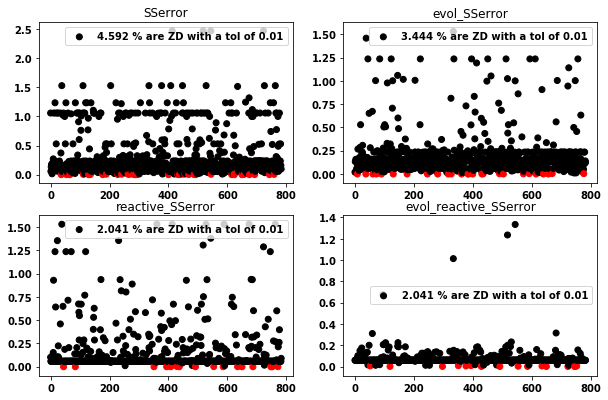

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i, column in enumerate(error_columns):
    index = (int(i / 2), i % 2)
    plot_sserror(df.index, df[column], ax=axes[index]);
    
    axes[index].set_title(column);
    axes[index].legend()

In [24]:
tol = 10 ** -2

In [25]:
tolerances = [10 ** -i for i in range(2, 5)]
percentages = []
for tol in tolerances:
    results = [len([x for x in df[column].values if x < tol]) / len(df[column].values)
               for column in error_columns]
    results = [np.round(100 * x) for x in results]
    percentages.append(results)

In [26]:
table = pd.DataFrame(percentages, columns=error_columns)
table['tolerance'] = tolerances

In [27]:
table.set_index('tolerance')

,SSerror,evol_SSerror,reactive_SSerror,evol_reactive_SSerror
tolerance,,,,
0.0100,5.0,3.0,2.0,2.0
0.0010,2.0,3.0,2.0,1.0
0.0001,1.0,2.0,2.0,0.0


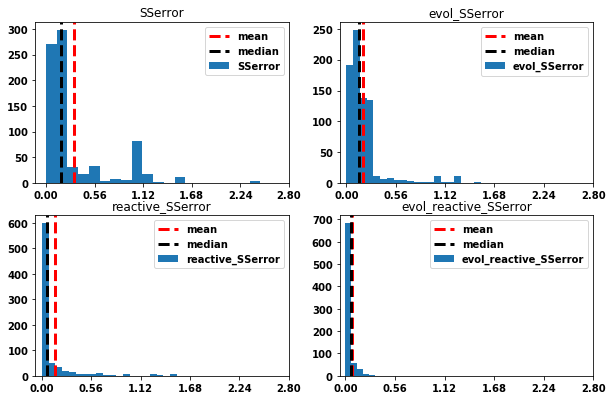

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i, column in enumerate(error_columns):
    index = (int(i / 2), i % 2)
    axes[index].hist(df[column], bins=20);
    axes[index].axvline(
        np.mean(df[column]), color="red", linestyle="dashed", linewidth=3, label="mean"
    )
    axes[index].set_xticks(np.linspace(0, 2.8, 6))
    axes[index].axvline(
        np.median(df[column]),
        color="black",
        linestyle="dashed",
        linewidth=3,
        label="median",
    )
    axes[index].legend()
    axes[index].set_title(column)

In [25]:
df[error_columns].describe()

,SSerror,evol_SSerror,reactive_SSerror,evol_reactive_SSerror
count,784.000000,7.840000e+02,784.000000,784.000000
mean,0.328723,1.925078e-01,0.143040,0.070604
std,0.400078,2.202446e-01,0.241400,0.079516
min,0.000000,5.882353e-18,0.000000,0.000000
25%,0.072580,8.060896e-02,0.058824,0.058824
50%,0.168680,1.430074e-01,0.058824,0.058824
75%,0.323880,2.352941e-01,0.066019,0.058824
max,2.470588,1.529412e+00,1.529412,1.334251


In [66]:
F, p = stats.f_oneway(df['SSerror'], df['evol_SSerror'], df['reactive_SSerror'], df['evol_reactive_SSerror'])

In [67]:
F, p

(136.05181760758177, 7.409835193993609e-83)

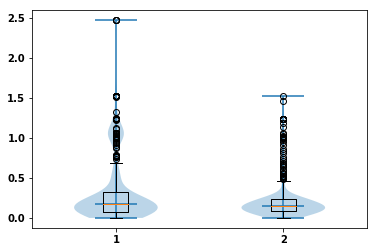

In [37]:
data = [df[column] for column in error_columns[:2]]
plt.violinplot(data, showmedians=True);
plt.boxplot(data);

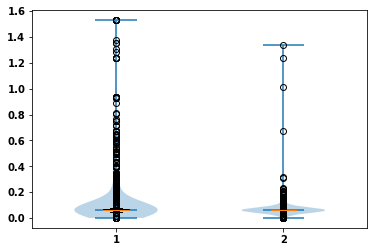

In [35]:
fig = plt.figure()
data = [df[column] for column in error_columns[2:]]
plt.violinplot(data, showmedians=True);
plt.boxplot(data);

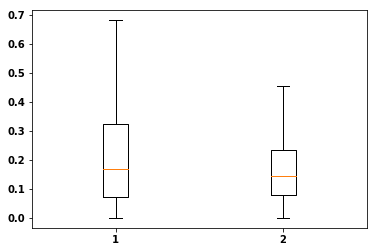

In [125]:
data = [df[column] for column in error_columns[:2]]
plt.boxplot(data, showfliers=False);

In [24]:
# ANOVE + other statistical tests

**Distributions of p**

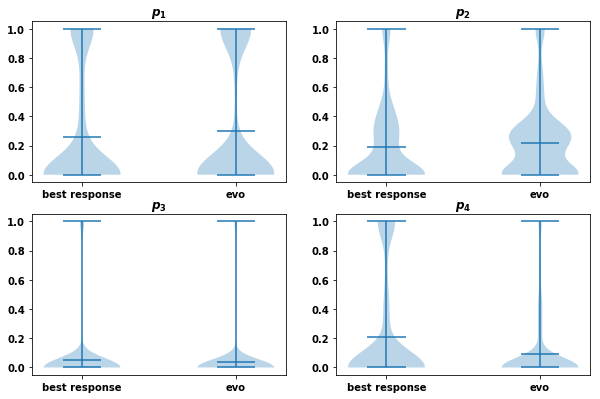

In [92]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i in range(4):
    index = (int(i / 2), i % 2)

    axes[index].violinplot(
        [df["mem_one_p_{}".format(i + 1)], df["evol_mem_one_p_{}".format(i + 1)]],
        showmeans=True,
    )

    axes[index].set_title(r"$p_{}$".format(i + 1))

    plt.setp(axes[index], xticks=[1, 2], xticklabels=["best response", "evo"])

In [90]:
# ANOVA and removing outliers

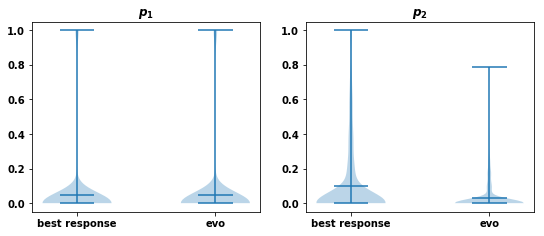

In [39]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 3.5))

for i in range(2):

    axes[i].violinplot(
        [df["reactive_p_{}".format(i + 1)], df["evol_reactive_p_{}".format(i + 1)]],
        showmeans=True,
    )

    axes[i].set_title(r"$p_{}$".format(i + 1))

    plt.setp(axes[i], xticks=[1, 2], xticklabels=["best response", "evo"])

**Distance and ratio of cooperation. Betwenn best response and evo**

In [93]:
distances = [
    [
        (row["evol_mem_one_p_{}".format(p + 1)] - row["mem_one_p_{}".format(p + 1)])
        for _, row in df.iterrows()
    ]
    for p in range(4)
]

In [110]:
ratios = []
for p in range(4):
    ratio = []
    for _, row in df.iterrows():
        try:
            ratio.append(
                row["mem_one_p_{}".format(p + 1)]
                / row["evol_mem_one_p_{}".format(p + 1)]
            )
        except ZeroDivisionError:
            pass
    ratios.append(ratio)

In [95]:
labels = ["$p_1$", "$p_2$", "$p_3$", "$p_4$"]

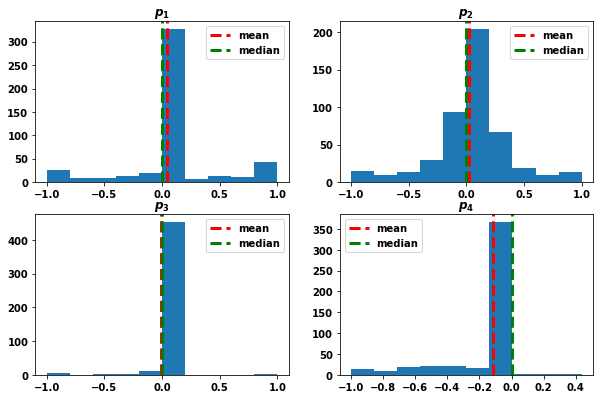

In [96]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))
for i, distance in enumerate(distances):
    index = (int(i / 2), i % 2)

    axes[index].hist(distance)
    axes[index].axvline(
        np.mean(distance), color="red", linestyle="dashed", linewidth=3, label="mean"
    )
    axes[index].axvline(
        np.median(distance),
        color="green",
        linestyle="dashed",
        linewidth=3,
        label="median",
    )
    axes[index].set_title(labels[i])
    axes[index].legend()

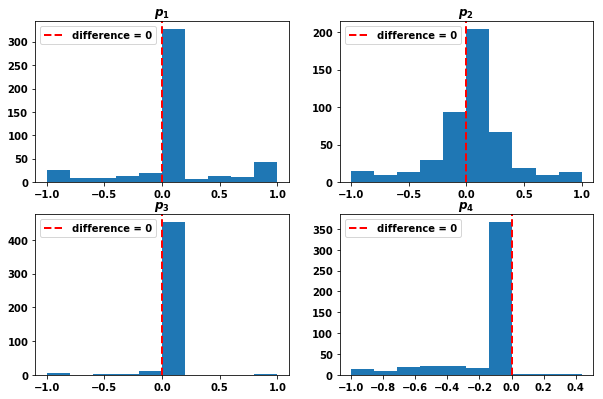

In [99]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))
for i, distance in enumerate(distances):
    index = (int(i / 2), i % 2)

    axes[index].hist(distance)
    axes[index].axvline(
        0, color="red", linestyle="dashed", linewidth=2, label="difference = 0"
    )
    axes[index].set_title(labels[i])

    axes[index].legend()


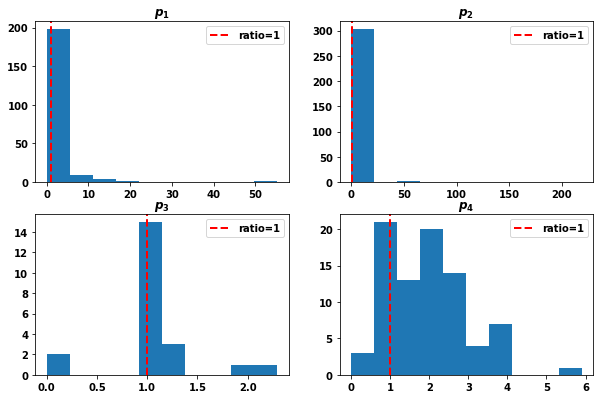

In [114]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))
for i, ratio in enumerate(ratios):
    index = (int(i / 2), i % 2)

    axes[index].hist(ratio)
    axes[index].axvline(
        1, color="red", linestyle="dashed", linewidth=2, label="ratio=1"
    )
    axes[index].set_title(labels[i])
    axes[index].legend()


**Ratio cooperation between  best response and Gambler**
Get the coop ratio from tournament

In [119]:
for q_one, q_two, gambler in zip(df_with_g.loc[:, df_with_g.columns.str.contains('first')].values,
                                    df_with_g.loc[:, df_with_g.columns.str.contains('second')].values,
                                    df_with_g.loc[:, df_with_g.columns.str.contains('gambler_paramater')].values):
    pass

**Compare to longer memory**

In [120]:
utility = []
x = []
for i, row in df_with_g.iterrows():
    x.append(i)
    p = (row["mem_one_p_1"], row["mem_one_p_2"], row["mem_one_p_3"], row["mem_one_p_4"])
    q_1 = (
        row["first_opponent_q_1"],
        row["first_opponent_q_2"],
        row["first_opponent_q_3"],
        row["first_opponent_q_4"],
    )
    q_2 = (
        row["second_opponent_q_1"],
        row["second_opponent_q_2"],
        row["second_opponent_q_3"],
        row["second_opponent_q_4"],
    )
    utility.append(opt_mo.tournament_utility(p, [q_1, q_2]))


In [121]:
df_with_g["mem_one_utility"] = utility
x = range(len(df_with_g["gambler_utility"]))

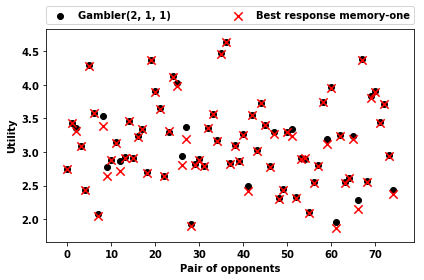

In [122]:
fig, ax = plt.subplots()

plt.scatter(x, df_with_g["gambler_utility"], label="Gambler(2, 1, 1)", color="black")
plt.scatter(
    x,
    df_with_g["mem_one_utility"],
    marker="x",
    label="Best response memory-one",
    color="red",
    s=70,
)

plt.ylabel("Utility", fontsize=10, fontweight="bold")
plt.xlabel("Pair of opponents", fontsize=10, fontweight="bold")
lgd = plt.legend(
    bbox_to_anchor=(0.0, 1.02, 1.0, 0.102),
    loc=3,
    ncol=2,
    mode="expand",
    borderaxespad=0.0,
)

fig.tight_layout()

**Correlations**

In [30]:
import seaborn as sbn
from sklearn.linear_model import LinearRegression

In [31]:
correlation = df[df.columns[1:-22]].corr().round(2)

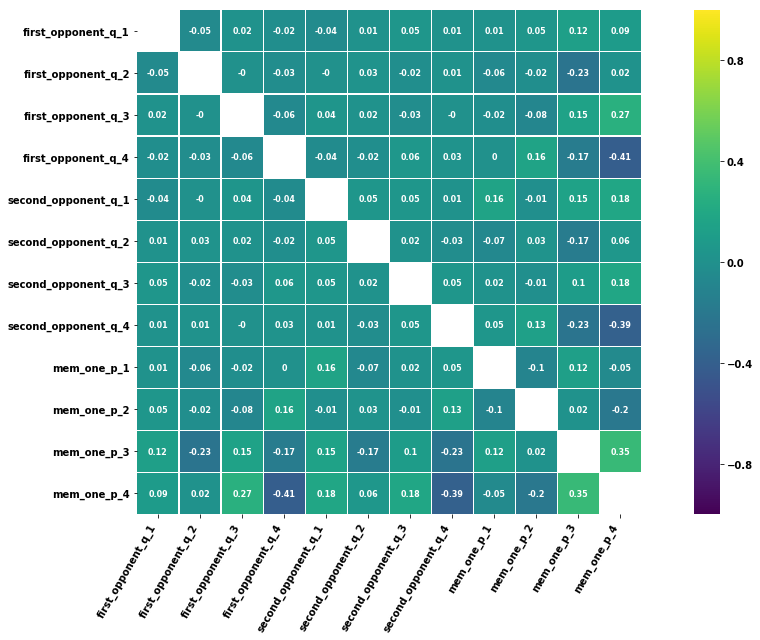

In [32]:
fig, ax = plt.subplots(1, figsize=(15, 9))

sbn.heatmap(
    correlation.replace(1, np.nan), square=True, cmap='viridis', vmin=-1, vmax=1,
    lw=0.1, annot=True, annot_kws={'fontsize': 8}, ax=ax)

for label in ax.get_xticklabels():
    label.set_rotation(60)
    label.set_horizontalalignment('right')

plt.tight_layout()

In [117]:
temp = df[df.columns[1:-22]]

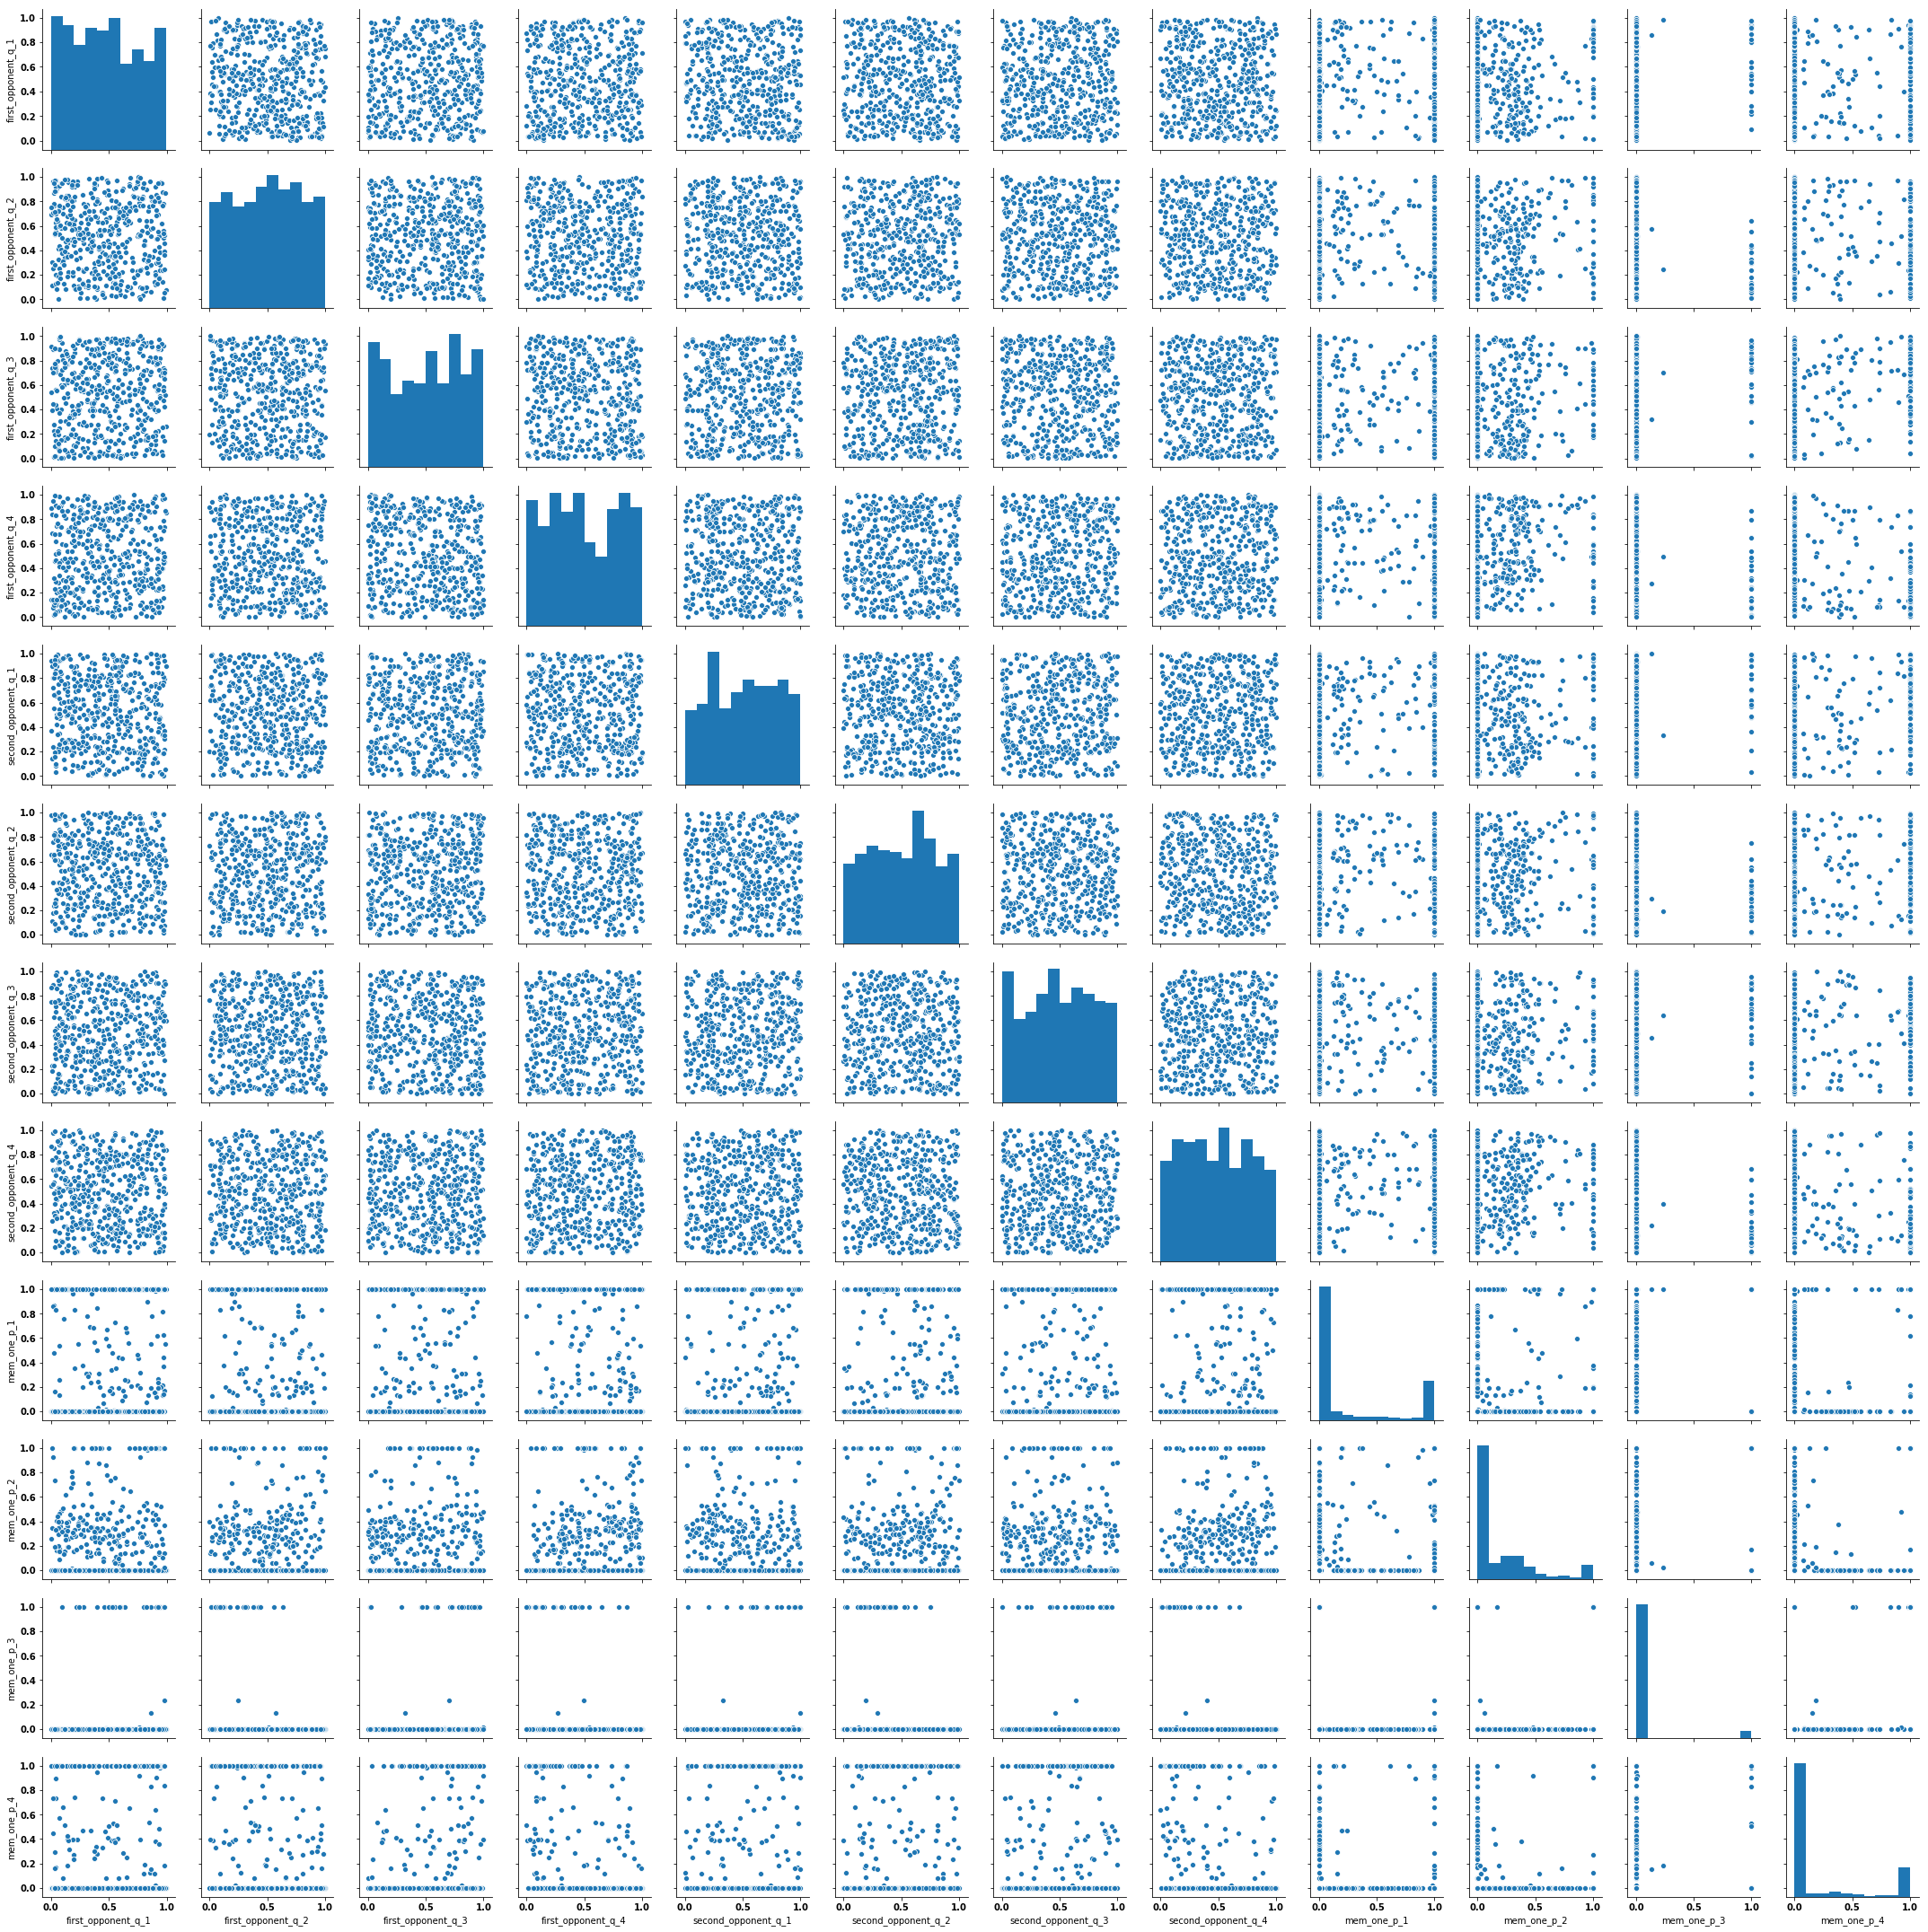

In [119]:
sbn.pairplot(temp);

**Evo**

In [120]:
columns = list(df.columns[1:-26].values)
columns += list(df.columns[13:17].values)

In [121]:
correlation = df[columns].corr().round(2)

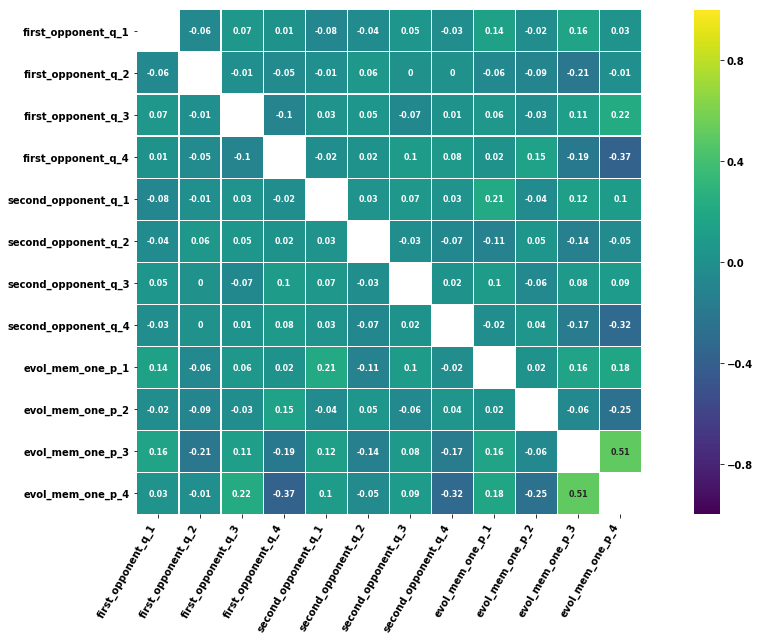

In [122]:
fig, ax = plt.subplots(1, figsize=(15, 9))

sbn.heatmap(
    correlation.replace(1, np.NaN), square=True, cmap='viridis', vmin=-1, vmax=1,
    lw=0.1, annot=True, annot_kws={'fontsize': 8}, ax=ax)

for label in ax.get_xticklabels():
    label.set_rotation(60)
    label.set_horizontalalignment('right')

plt.tight_layout()

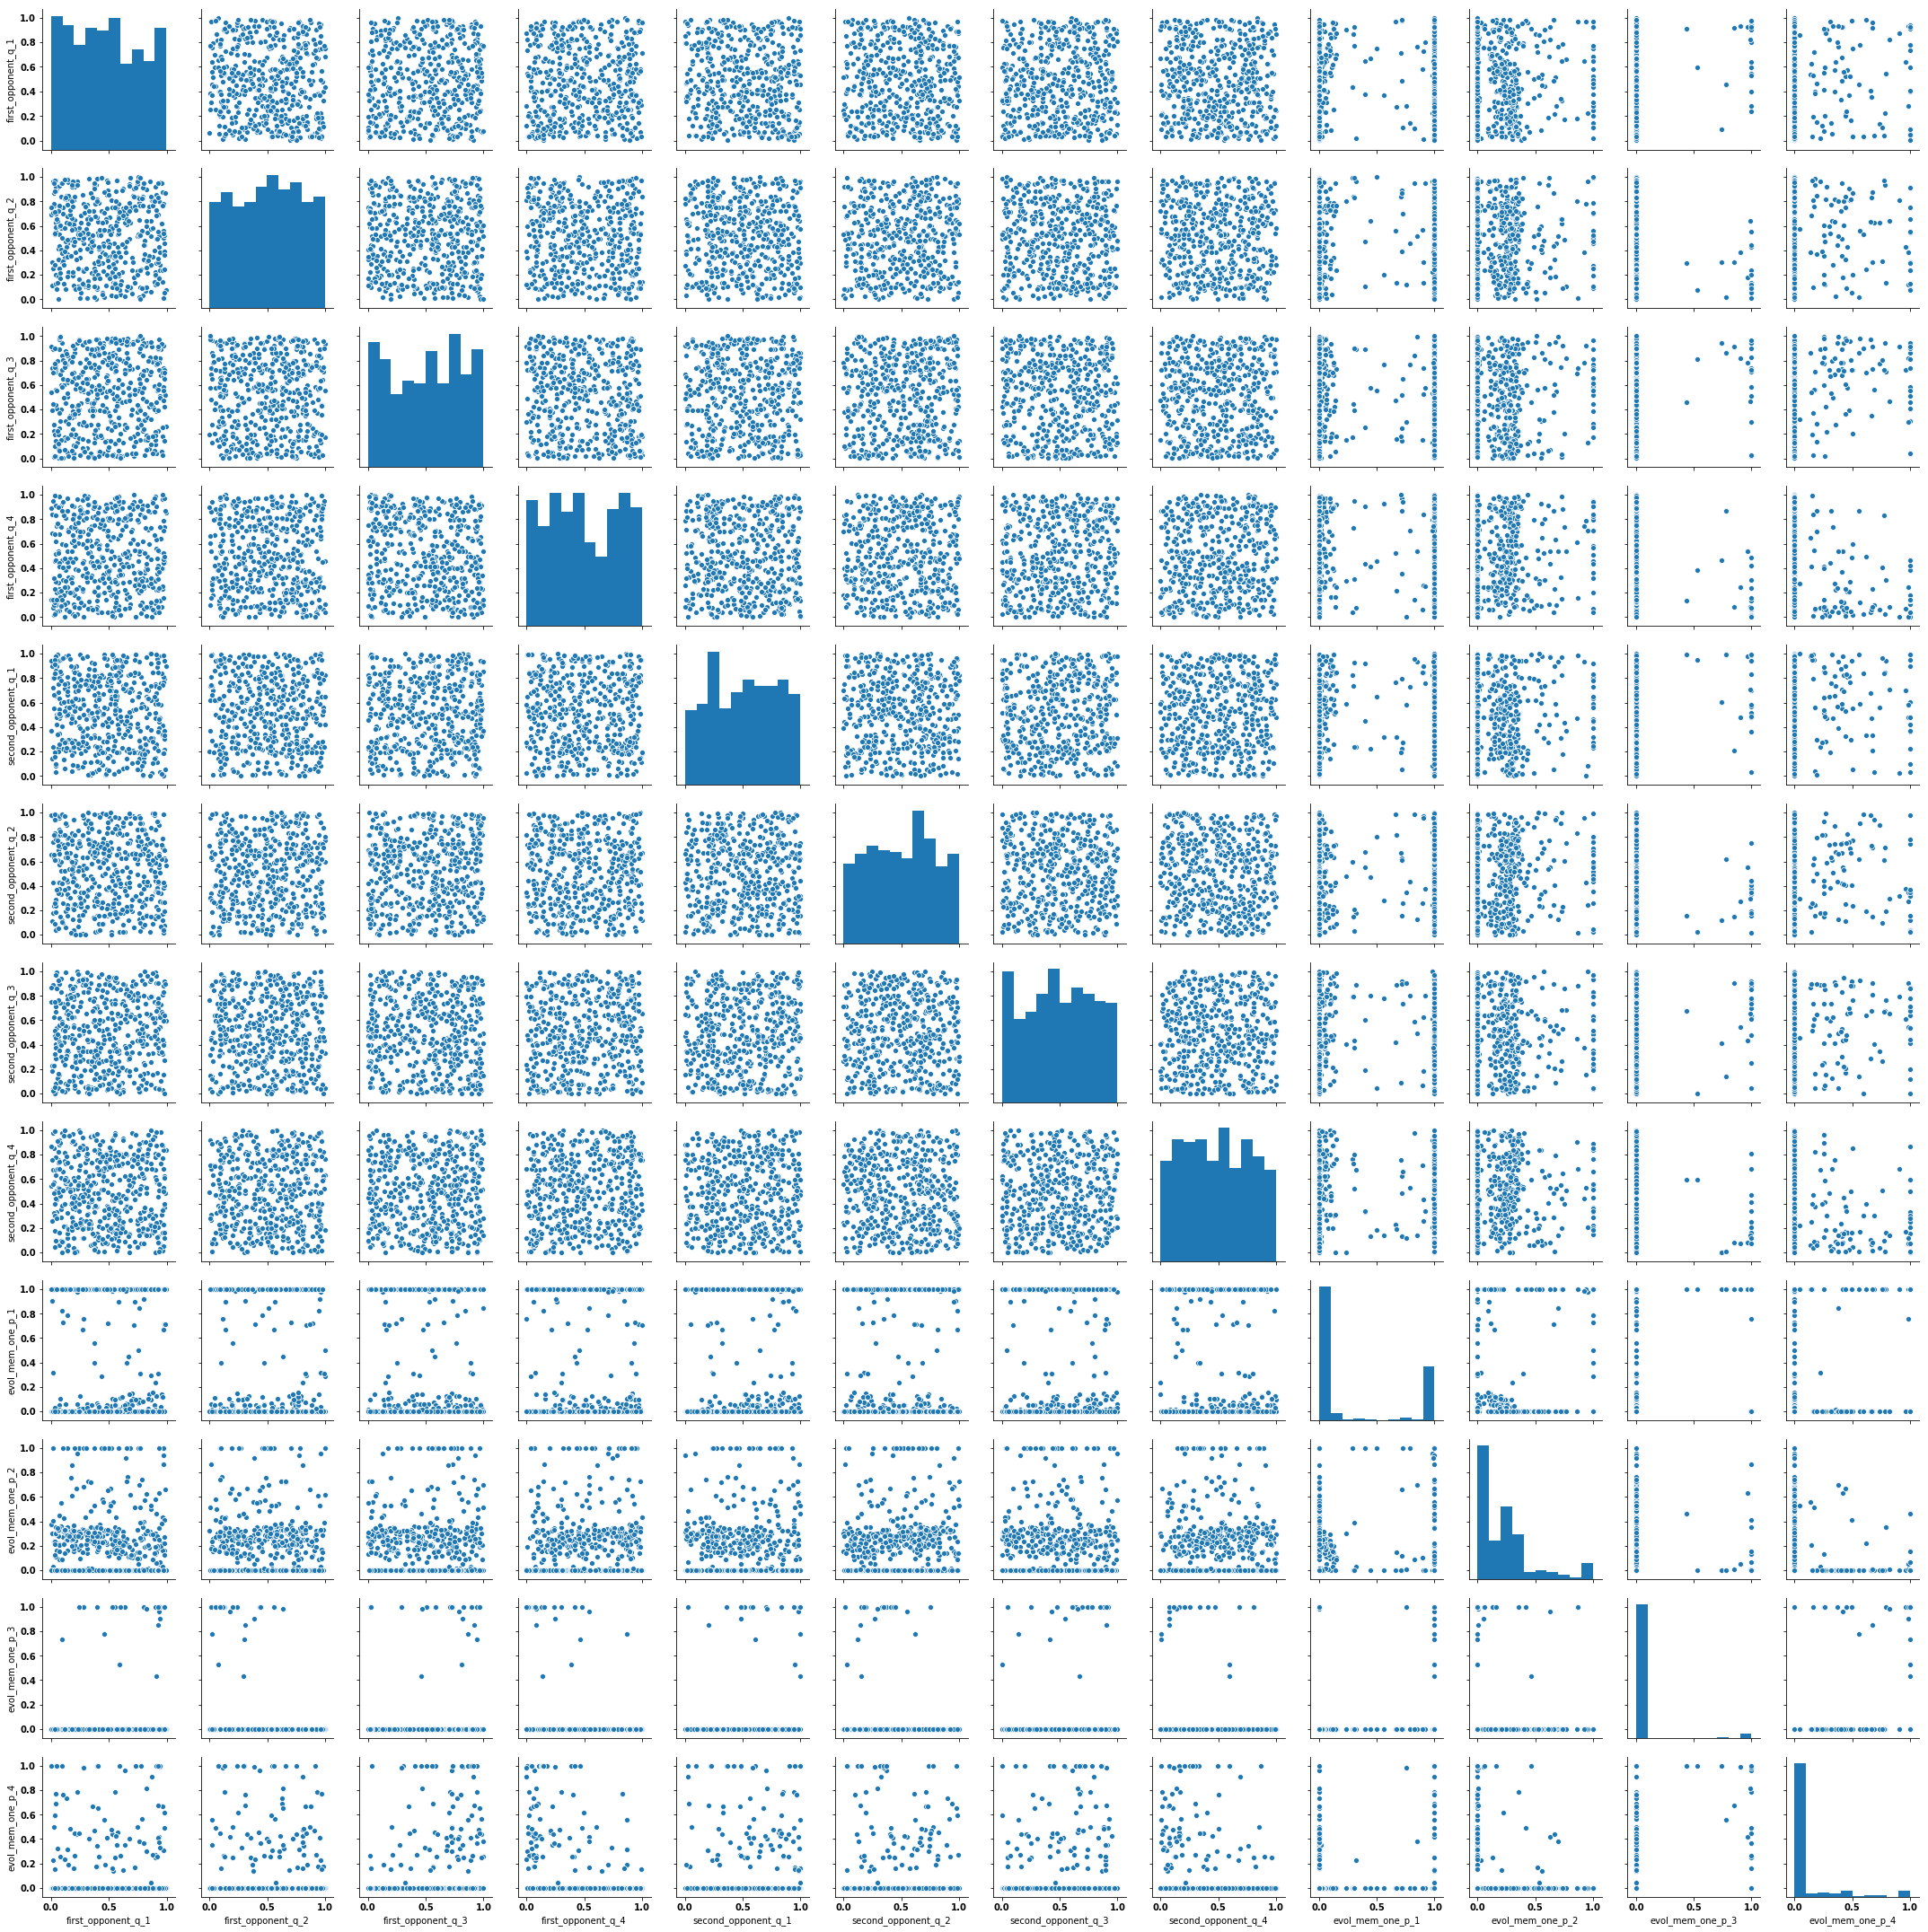

In [124]:
sbn.pairplot(df[columns]);